In [1]:
#Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('1. Weather Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.shape

(8784, 8)

In [4]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [7]:
df.duplicated().sum()

0

2. STATISTICAL SUMMARY


In [8]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


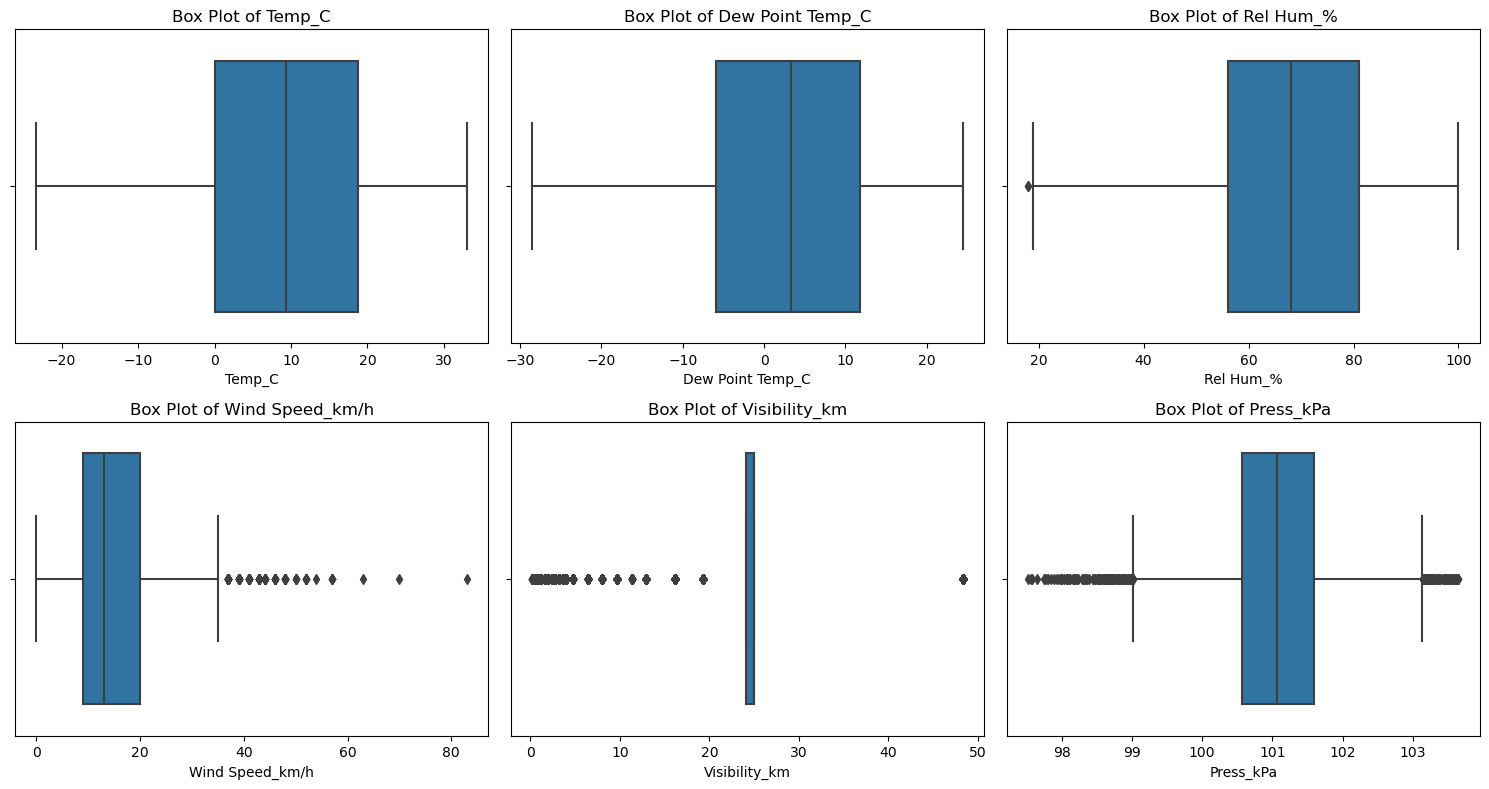

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Determine the number of subplots (one for each numeric column)
num_cols = numeric_cols.shape[1]
rows = (num_cols + 2) // 3  # Adjust the layout to have up to 3 plots per row

# Create a figure with subplots
plt.figure(figsize=(15, rows * 4))

for i, column in enumerate(numeric_cols.columns):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=numeric_cols[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()


3. DATA VISULIZATION

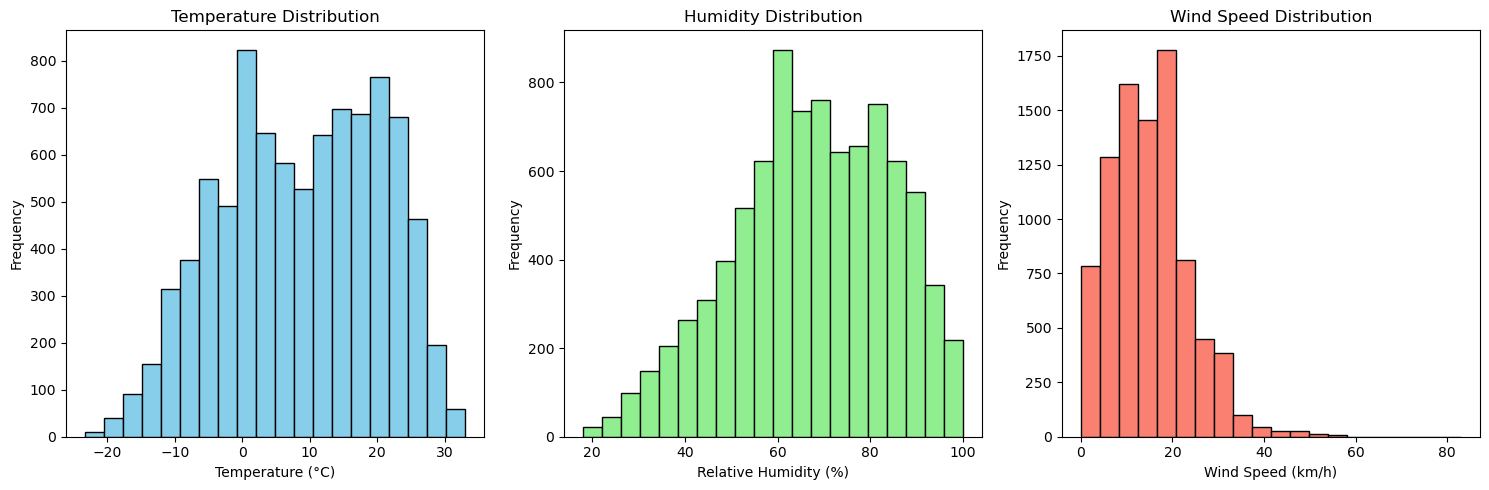

In [10]:
plt.figure(figsize=(15, 5))

# Plot histogram for Temperature
plt.subplot(1, 3, 1)
plt.hist(df['Temp_C'], bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Plot histogram for Humidity
plt.subplot(1, 3, 2)
plt.hist(df['Rel Hum_%'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Humidity Distribution')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')

# Plot histogram for Wind Speed
plt.subplot(1, 3, 3)
plt.hist(df['Wind Speed_km/h'], bins=20, color='salmon', edgecolor='black')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


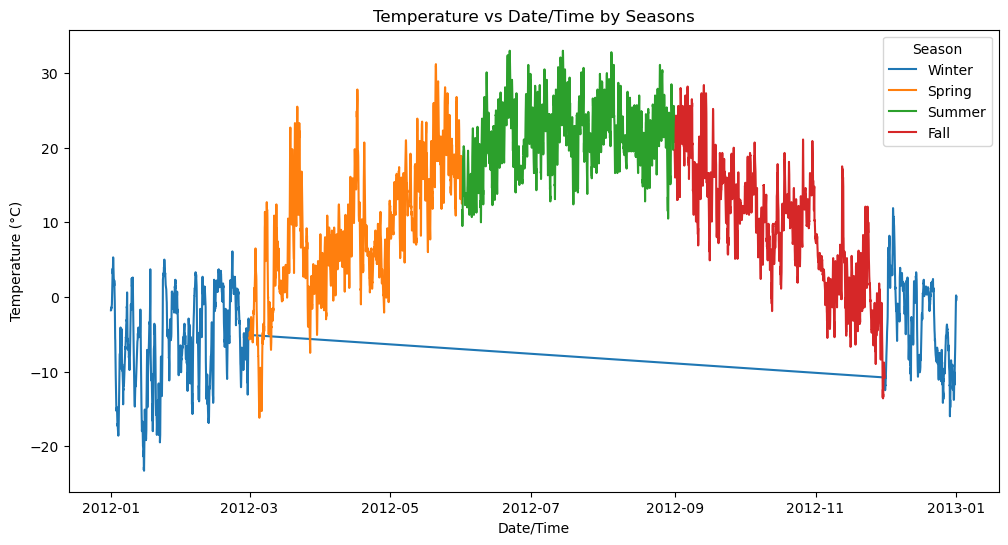

In [13]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Define a mapping of months to seasons
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Map the months to seasons
df['Season'] = df['Date/Time'].dt.month.map(month_to_season)

# Plot temperature vs Date/Time by seasons
plt.figure(figsize=(12, 6))
for season in df['Season'].unique():
    season_data = df[df['Season'] == season]
    plt.plot(season_data['Date/Time'], season_data['Temp_C'], label=season)

plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Date/Time by Seasons')
plt.legend(title='Season')
plt.show()



In [22]:
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()
corr_matrix




,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Month
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389,0.218048
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616,0.299641
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424,0.232040
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613,-0.030506
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847,-0.027314
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000,0.070355
Month,0.218048,0.299641,0.232040,-0.030506,-0.027314,0.070355,1.000000


4. WEATHER PATTERNS AND TRENDS